In [1]:
import numpy as np
import matplotlib.pyplot as plt

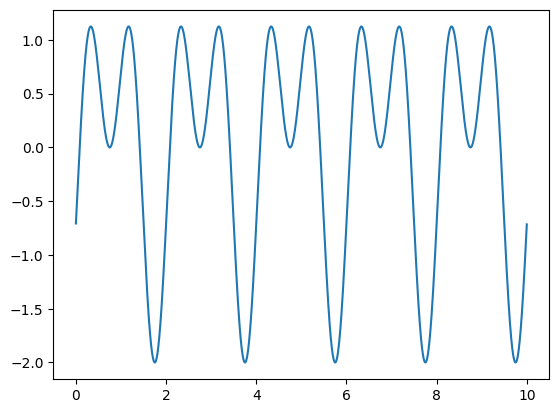

In [2]:
t = np.arange(0,10,0.001)
s = np.sin(2*np.pi*t)+np.sin(2*np.pi*t/2-np.pi/4)
plt.plot(t,s)

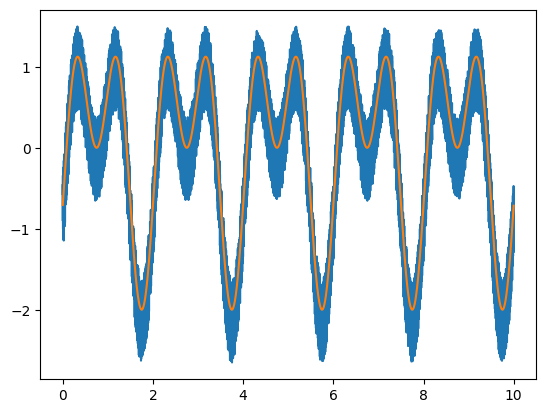

In [3]:
n = np.random.uniform(np.min(s)/3, np.max(s)/3, len(t))
sn = s+n
plt.plot(t,sn)
plt.plot(t,s)

In [4]:
print(np.min(s)/10, np.max(s)/10, len(t))

-0.2 0.11249965672087192 10000


In [5]:
fil = np.ones(100)

s_for_conv = np.ones(len(s)+2*len(fil)//2-1)
s_for_conv[len(fil)//2:len(fil)//2+len(s)] = sn
print(len(s_for_conv))

10099


In [6]:
s_matrix = []
for i in range(len(s)):
    s_matrix.append(s_for_conv[i:i+len(fil)])
print(len(s_matrix))
s_matrix = np.array(s_matrix)
print(s_matrix.shape)

10000
(10000, 100)


In [7]:
c = np.linalg.lstsq(s_matrix, s)
print(c[0])

[0.00511823 0.00482488 0.00492539 0.00493696 0.00508918 0.00511679
 0.00514745 0.00506043 0.00468798 0.00447535 0.00440086 0.00474277
 0.00439655 0.00423065 0.00408602 0.00425811 0.00405956 0.00466558
 0.00497087 0.00488062 0.00488833 0.0047431  0.00508828 0.00527464
 0.00571619 0.00588559 0.00621125 0.00647826 0.00719783 0.007465
 0.00824357 0.00914976 0.00945265 0.01016506 0.01105441 0.01199596
 0.01262892 0.01359875 0.01403528 0.01489221 0.01556673 0.01669938
 0.01732494 0.01809236 0.0191674  0.02060923 0.0221056  0.02323477
 0.02422279 0.02543181 0.02740633 0.02596058 0.024905   0.0233791
 0.02259817 0.02126928 0.01990738 0.01917743 0.01814428 0.01726064
 0.01639005 0.0158255  0.01526229 0.01456839 0.01335933 0.01302629
 0.01234941 0.01184154 0.01078768 0.01021055 0.00967804 0.00950827
 0.00863155 0.0078427  0.00792306 0.00729971 0.00719839 0.0065963
 0.00579622 0.00565199 0.005524   0.00571686 0.00510252 0.00518349
 0.00504707 0.00501881 0.00490316 0.00442952 0.00437036 0.00402713

/var/folders/99/v1wy20j91k74gb3962zhvhbm0000gn/T/ipykernel_63036/1955328950.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, s)


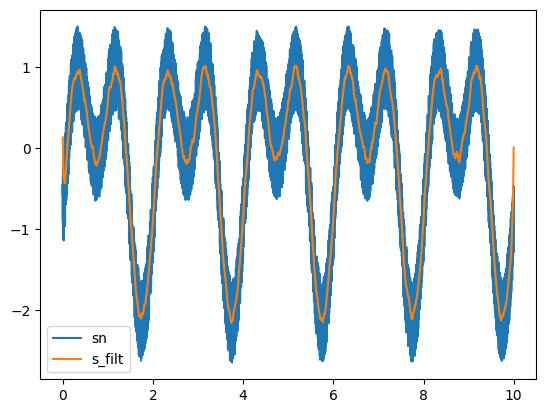

In [8]:
s_filt = s_matrix @ c[0]#[::-1]
plt.plot(t, sn, label = 'sn')
plt.plot(t, s_filt, label = 's_filt')
plt.legend()

(array([1145.,  510.,  420.,  370.,  370.,  370., 1535., 1270., 1310.,
        2700.]),
 array([-2.        , -1.68750034, -1.37500069, -1.06250103, -0.75000137,
        -0.43750172, -0.12500206,  0.1874976 ,  0.49999725,  0.81249691,
         1.12499657]),
 <BarContainer object of 10 artists>)

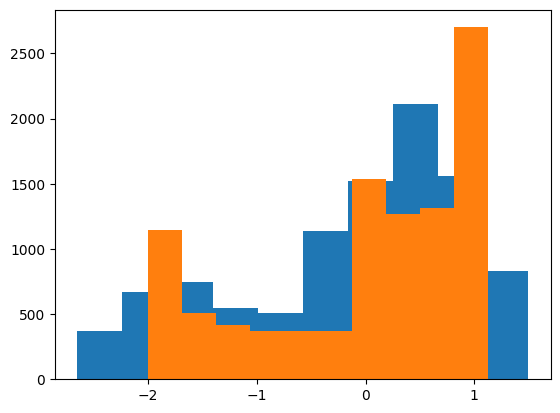

In [9]:
plt.hist(sn)
plt.hist(s)

In [10]:
len(fil)

100

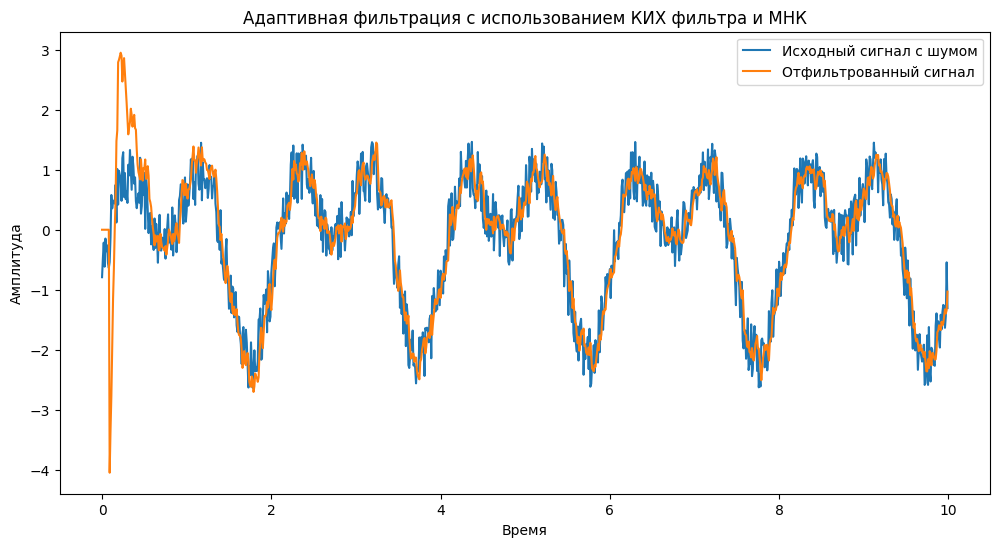

In [11]:
import numpy as np
from scipy.signal import lfilter, lfilter_zi

def adaptive_filter(signal, order):
    filtered_signal = np.zeros_like(signal)
    a = np.ones(order + 1)  
    P = np.eye(order + 1) * 0.1

    for i in range(order, len(signal)):
        x = signal[i-order:i][::-1]
        y_hat = np.dot(x, a[1:])
        
        error = signal[i] - y_hat
        x = np.insert(x, 0, 1)
        # Обновление коэффициентов с использованием метода наименьших квадратов
        P -= np.outer(P.dot(x), x.dot(P)) / (1 + x.dot(P).dot(x))
        a += P.dot(x) * error

        filtered_signal[i] = y_hat

    return filtered_signal

t = np.linspace(0, 10, 1000, endpoint=False)
s = np.sin(2*np.pi*t) + np.sin(2*np.pi*t/2 - np.pi/4)
n = np.random.uniform(np.min(s)/3, np.max(s)/3, len(t))
sn = s + n

#адаптивный фильтр
order = 9

# Применение адаптивного фильтра
filtered_sn = adaptive_filter(sn, order)

plt.figure(figsize=(12, 6))
plt.plot(t, sn, label='Исходный сигнал с шумом')
plt.plot(t, filtered_sn, label='Отфильтрованный сигнал')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Адаптивная фильтрация с использованием КИХ фильтра и МНК')
plt.show()